<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkPY0220ENSkillsNetwork900-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


<h1>Extracting and Visualizing Stock Data</h1>
<h2>Description</h2>


Extracting essential data from a dataset and displaying it is a necessary part of data science; therefore individuals can make correct decisions based on the data. In this assignment, you will extract some stock data, you will then display this data in a graph.


<h2>Table of Contents</h2>
<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
        <li>Define a Function that Makes a Graph</li>
        <li>Question 1: Use yfinance to Extract Stock Data</li>
        <li>Question 2: Use Webscraping to Extract Tesla Revenue Data</li>
        <li>Question 3: Use yfinance to Extract Stock Data</li>
        <li>Question 4: Use Webscraping to Extract GME Revenue Data</li>
        <li>Question 5: Plot Tesla Stock Graph</li>
        <li>Question 6: Plot GameStop Stock Graph</li>
    </ul>
<p>
    Estimated Time Needed: <strong>30 min</strong></p>
</div>

<hr>


***Note***:- If you are working in IBM Cloud Watson Studio, please replace the command for installing nbformat from `!pip install nbformat==4.2.0` to simply `!pip install nbformat`


In [1]:
pip install nbformat --upgrade

  Using cached nbformat-5.8.0-py3-none-any.whl (77 kB)
  Attempting uninstall: nbformat
    Found existing installation: nbformat 4.2.0
    Uninstalling nbformat-4.2.0:
      Successfully uninstalled nbformat-4.2.0
Note: you may need to restart the kernel to use updated packages.


In [2]:
!pip install yfinance==0.1.67
!mamba install bs4==4.10.0 -y
!pip install nbformat==4.2.0


                  __    __    __    __
                 /  \  /  \  /  \  /  \
                /    \/    \/    \/    \
███████████████/  /██/  /██/  /██/  /████████████████████████
              /  / \   / \   / \   / \  \____
             /  /   \_/   \_/   \_/   \    o \__,
            / _/                       \_____/  `
            |/
        ███╗   ███╗ █████╗ ███╗   ███╗██████╗  █████╗
        ████╗ ████║██╔══██╗████╗ ████║██╔══██╗██╔══██╗
        ██╔████╔██║███████║██╔████╔██║██████╔╝███████║
        ██║╚██╔╝██║██╔══██║██║╚██╔╝██║██╔══██╗██╔══██║
        ██║ ╚═╝ ██║██║  ██║██║ ╚═╝ ██║██████╔╝██║  ██║
        ╚═╝     ╚═╝╚═╝  ╚═╝╚═╝     ╚═╝╚═════╝ ╚═╝  ╚═╝

        mamba (1.4.2) supported by @QuantStack

        GitHub:  https://github.com/mamba-org/mamba
        Twitter: https://twitter.com/QuantStack

█████████████████████████████████████████████████████████████


Looking for: ['bs4==4.10.0']

[+] 0.0s
[+] 0.1s
pkgs/main/linux-64 ━━━━━━━━━━━━╸━━━━━━━━━━━━   0.0 B /  ??.?MB @ 

In [3]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In Python, you can ignore warnings using the warnings module. You can use the filterwarnings function to filter or ignore specific warning messages or categories.


In [4]:
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore", category=FutureWarning)

## Define Graphing Function


In this section, we define the function `make_graph`. You don't have to know how the function works, you should only care about the inputs. It takes a dataframe with stock data (dataframe must contain Date and Close columns), a dataframe with revenue data (dataframe must contain Date and Revenue columns), and the name of the stock.


In [5]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2021--06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date, infer_datetime_format=True), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date, infer_datetime_format=True), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()

## Question 1: Use yfinance to Extract Stock Data


Using the `Ticker` function enter the ticker symbol of the stock we want to extract data on to create a ticker object. The stock is Tesla and its ticker symbol is `TSLA`.


In [6]:
import yfinance as yf
tesla = yf.Ticker("TSLA")
info_tesla = tesla.info
print(info_tesla)

{'regularMarketPrice': None, 'preMarketPrice': None, 'logo_url': ''}


Using the ticker object and the function `history` extract stock information and save it in a dataframe named `tesla_data`. Set the `period` parameter to `max` so we get information for the maximum amount of time.


In [7]:
tesla_data = tesla.history(period="max")
tesla_data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2010-06-29,1.266667,1.666667,1.169333,1.592667,281494500,0,0.0
2010-06-30,1.719333,2.028000,1.553333,1.588667,257806500,0,0.0
2010-07-01,1.666667,1.728000,1.351333,1.464000,123282000,0,0.0
2010-07-02,1.533333,1.540000,1.247333,1.280000,77097000,0,0.0
2010-07-06,1.333333,1.333333,1.055333,1.074000,103003500,0,0.0


**Reset the index** using the `reset_index(inplace=True)` function on the tesla_data DataFrame and display the first five rows of the `tesla_data` dataframe using the `head` function. Take a screenshot of the results and code from the beginning of Question 1 to the results below.


In [8]:
tesla_data.reset_index(inplace=True)
tesla_data.head(100)

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29,1.266667,1.666667,1.169333,1.592667,281494500,0,0.0
1,2010-06-30,1.719333,2.028000,1.553333,1.588667,257806500,0,0.0
2,2010-07-01,1.666667,1.728000,1.351333,1.464000,123282000,0,0.0
3,2010-07-02,1.533333,1.540000,1.247333,1.280000,77097000,0,0.0
4,2010-07-06,1.333333,1.333333,1.055333,1.074000,103003500,0,0.0
...,...,...,...,...,...,...,...,...
95,2010-11-11,1.906667,1.940000,1.822000,1.869333,29179500,0,0.0
96,2010-11-12,1.883333,2.033333,1.871333,1.989333,40936500,0,0.0
97,2010-11-15,2.014667,2.196000,2.014667,2.053333,39343500,0,0.0
98,2010-11-16,2.066667,2.093333,1.894667,1.978000,20214000,0,0.0


## Question 2: Use Webscraping to Extract Tesla Revenue Data


Use the `requests` library to download the webpage https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm Save the text of the response as a variable named `html_data`.


In [9]:
pip install requests

Note: you may need to restart the kernel to use updated packages.


In [10]:
import requests

url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
response = requests.get(url)


if response.status_code == 200:
    html_data = response.text
    print("Descarga exitosa. Longitud del contenido:", len(html_data))
else:
    print("Error al descargar la página. Código de estado:", response.status_code)

Descarga exitosa. Longitud del contenido: 64779


Parse the html data using `beautiful_soup`.


In [11]:
pip install beautifulsoup4

Note: you may need to restart the kernel to use updated packages.


In [12]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(html_data, 'html.parser')
title = soup.title
print("Título de la página:", title.text if title else "No se encontró un título")
links = soup.find_all('a')
print("Enlaces encontrados:")
for link in links:
    print(link.get('href'))
paragraphs = soup.find_all('p')
print("Contenido de los párrafos:")
for paragraph in paragraphs:
    print(paragraph.text.strip())

Título de la página: Tesla Revenue 2010-2022 | TSLA | MacroTrends
Enlaces encontrados:
https://www.macrotrends.net
/stocks/stock-screener
/stocks/research
/charts/stock-indexes
/charts/precious-metals
/charts/energy
/charts/commodities
/charts/exchange-rates
/charts/interest-rates
/charts/economy
/countries/topic-overview
https://www.macrotrends.net/stocks/charts/TSLA/tesla/stock-price-history
https://www.macrotrends.net/stocks/charts/TSLA/tesla/financial-statements
https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue
https://www.macrotrends.net/stocks/charts/TSLA/tesla/total-assets
https://www.macrotrends.net/stocks/charts/TSLA/tesla/profit-margins
https://www.macrotrends.net/stocks/charts/TSLA/tesla/pe-ratio
https://www.macrotrends.net/stocks/charts/TSLA/tesla/current-ratio
https://www.macrotrends.net/stocks/charts/TSLA/tesla/dividend-yield-history
https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue
https://www.macrotrends.net/stocks/charts/TSLA/tesla/gross-profit
ht

Using `BeautifulSoup` or the `read_html` function extract the table with `Tesla Revenue` and store it into a dataframe named `tesla_revenue`. The dataframe should have columns `Date` and `Revenue`.


<details><summary>Click here if you need help locating the table</summary>

```
    
Below is the code to isolate the table, you will now need to loop through the rows and columns like in the previous lab
    
soup.find_all("tbody")[1]
    
If you want to use the read_html function the table is located at index 1


```

</details>


In [13]:
import pandas as pd
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
tables = pd.read_html(url)
tesla_revenue = tables[0]
tesla_revenue.head(22)

,Tesla Annual Revenue(Millions of US $),Tesla Annual Revenue(Millions of US $).1
0,2021,"$53,823"
1,2020,"$31,536"
2,2019,"$24,578"
3,2018,"$21,461"
4,2017,"$11,759"
5,2016,"$7,000"
6,2015,"$4,046"
7,2014,"$3,198"
8,2013,"$2,013"
9,2012,$413


In [14]:
tesla_revenue.columns = ['año', 'Revenue']
print(tesla_revenue.columns)

Index(['año', 'Revenue'], dtype='object')


In [15]:
tesla_revenue.head(22)

,año,Revenue
0,2021,"$53,823"
1,2020,"$31,536"
2,2019,"$24,578"
3,2018,"$21,461"
4,2017,"$11,759"
5,2016,"$7,000"
6,2015,"$4,046"
7,2014,"$3,198"
8,2013,"$2,013"
9,2012,$413


Execute the following line to remove the comma and dollar sign from the `Revenue` column. 


In [16]:
tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace(',|\$',"")

Execute the following lines to remove an null or empty strings in the Revenue column.


In [17]:
tesla_revenue.dropna(inplace=True)

tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]

Display the last 5 row of the `tesla_revenue` dataframe using the `tail` function. Take a screenshot of the results.


In [18]:
tesla_revenue.tail(5)

,año,Revenue
8,2013,2013
9,2012,413
10,2011,204
11,2010,117
12,2009,112


## Question 3: Use yfinance to Extract Stock Data


Using the `Ticker` function enter the ticker symbol of the stock we want to extract data on to create a ticker object. The stock is GameStop and its ticker symbol is `GME`.


In [19]:
import yfinance as yf

In [20]:
symbol = "GME"
gme_ticker = yf.Ticker(symbol)
gme_data = gme_ticker.info


Using the ticker object and the function `history` extract stock information and save it in a dataframe named `gme_data`. Set the `period` parameter to `max` so we get information for the maximum amount of time.


In [21]:
symbol = "GME"
gme_ticker = yf.Ticker(symbol)
gme_history = gme_ticker.history(period="max")
print("Historial de precios de GameStop (GME):")
print(gme_history.head())
gme_data = pd.DataFrame(gme_history)
print("\nDataFrame gme_data:")
print(gme_data.head())

Historial de precios de GameStop (GME):
                Open      High       Low     Close    Volume  Dividends  \
Date                                                                      
2002-02-13  1.620129  1.693350  1.603296  1.691667  76216000        0.0   
2002-02-14  1.712707  1.716074  1.670626  1.683250  11021600        0.0   
2002-02-15  1.683250  1.687458  1.658001  1.674834   8389600        0.0   
2002-02-19  1.666418  1.666418  1.578047  1.607504   7410400        0.0   
2002-02-20  1.615920  1.662210  1.603296  1.662210   6892800        0.0   

            Stock Splits  
Date                      
2002-02-13           0.0  
2002-02-14           0.0  
2002-02-15           0.0  
2002-02-19           0.0  
2002-02-20           0.0  

DataFrame gme_data:
                Open      High       Low     Close    Volume  Dividends  \
Date                                                                      
2002-02-13  1.620129  1.693350  1.603296  1.691667  76216000        0.0   

**Reset the index** using the `reset_index(inplace=True)` function on the gme_data DataFrame and display the first five rows of the `gme_data` dataframe using the `head` function. Take a screenshot of the results and code from the beginning of Question 3 to the results below.


In [22]:
gme_data.reset_index(inplace=True)
print("Primeras cinco filas de gme_data")
print(gme_data.head())

Primeras cinco filas de gme_data
        Date      Open      High       Low     Close    Volume  Dividends  \
0 2002-02-13  1.620129  1.693350  1.603296  1.691667  76216000        0.0   
1 2002-02-14  1.712707  1.716074  1.670626  1.683250  11021600        0.0   
2 2002-02-15  1.683250  1.687458  1.658001  1.674834   8389600        0.0   
3 2002-02-19  1.666418  1.666418  1.578047  1.607504   7410400        0.0   
4 2002-02-20  1.615920  1.662210  1.603296  1.662210   6892800        0.0   

   Stock Splits  
0           0.0  
1           0.0  
2           0.0  
3           0.0  
4           0.0  


## Question 4: Use Webscraping to Extract GME Revenue Data


Use the `requests` library to download the webpage https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html. Save the text of the response as a variable named `html_data`.


In [23]:
import requests


url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"


response = requests.get(url)


if response.status_code == 200:
    
    html_data = response.text
    print("Descarga exitosa.")
else:
    print(f"Error al descargar la página. Código de estado: {response.status_code}")



Descarga exitosa.


Parse the html data using `beautiful_soup`.


In [24]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(html_data, 'html.parser')
print("Título de la página:", soup.title.text)

Título de la página: GameStop Revenue 2006-2020 | GME | MacroTrends


Using `BeautifulSoup` or the `read_html` function extract the table with `GameStop Revenue` and store it into a dataframe named `gme_revenue`. The dataframe should have columns `Date` and `Revenue`. Make sure the comma and dollar sign is removed from the `Revenue` column using a method similar to what you did in Question 2.


<details><summary>Click here if you need help locating the table</summary>

```
    
Below is the code to isolate the table, you will now need to loop through the rows and columns like in the previous lab
    
soup.find_all("tbody")[1]
    
If you want to use the read_html function the table is located at index 1


```

</details>


In [25]:
pip install html5lib

Note: you may need to restart the kernel to use updated packages.


In [26]:
import pandas as pd
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"
tables = pd.read_html(url)
gme_revenue = tables[0]
gme_revenue.head(22)

,GameStop Annual Revenue(Millions of US $),GameStop Annual Revenue(Millions of US $).1
0,2020,"$6,466"
1,2019,"$8,285"
2,2018,"$8,547"
3,2017,"$7,965"
4,2016,"$9,364"
5,2015,"$9,296"
6,2014,"$9,040"
7,2013,"$8,887"
8,2012,"$9,551"
9,2011,"$9,474"


In [27]:
gme_revenue.columns = ['FECHA', 'INGRESOS']
print(gme_revenue.columns)

Index(['FECHA', 'INGRESOS'], dtype='object')


In [28]:
gme_revenue.head(22)

,FECHA,INGRESOS
0,2020,"$6,466"
1,2019,"$8,285"
2,2018,"$8,547"
3,2017,"$7,965"
4,2016,"$9,364"
5,2015,"$9,296"
6,2014,"$9,040"
7,2013,"$8,887"
8,2012,"$9,551"
9,2011,"$9,474"


In [29]:
gme_revenue["INGRESOS"] = gme_revenue['INGRESOS'].str.replace(',|\$',"")

Display the last five rows of the `gme_revenue` dataframe using the `tail` function. Take a screenshot of the results.


In [30]:
print(gme_revenue.tail())

    FECHA INGRESOS
11   2009     8806
12   2008     7094
13   2007     5319
14   2006     3092
15   2005     1843


## Question 5: Plot Tesla Stock Graph


Use the `make_graph` function to graph the Tesla Stock Data, also provide a title for the graph. The structure to call the `make_graph` function is `make_graph(tesla_data, tesla_revenue, 'Tesla')`. Note the graph will only show data upto June 2021.


In [31]:
import pandas as pd
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
tables = pd.read_html(url)
tesla_revenue_1 = tables[1]
tesla_revenue_1.head(22)

,Tesla Quarterly Revenue(Millions of US $),Tesla Quarterly Revenue(Millions of US $).1
0,2022-09-30,"$21,454"
1,2022-06-30,"$16,934"
2,2022-03-31,"$18,756"
3,2021-12-31,"$17,719"
4,2021-09-30,"$13,757"
5,2021-06-30,"$11,958"
6,2021-03-31,"$10,389"
7,2020-12-31,"$10,744"
8,2020-09-30,"$8,771"
9,2020-06-30,"$6,036"


In [32]:
tesla_revenue_1.columns = ['año', 'Revenue']
print(tesla_revenue.columns)

Index(['año', 'Revenue'], dtype='object')


In [33]:
tesla_revenue_1.head(10)

,año,Revenue
0,2022-09-30,"$21,454"
1,2022-06-30,"$16,934"
2,2022-03-31,"$18,756"
3,2021-12-31,"$17,719"
4,2021-09-30,"$13,757"
5,2021-06-30,"$11,958"
6,2021-03-31,"$10,389"
7,2020-12-31,"$10,744"
8,2020-09-30,"$8,771"
9,2020-06-30,"$6,036"


In [34]:
tesla_revenue_1["Revenue"] = tesla_revenue_1['Revenue'].str.replace(',|\$',"")

In [35]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


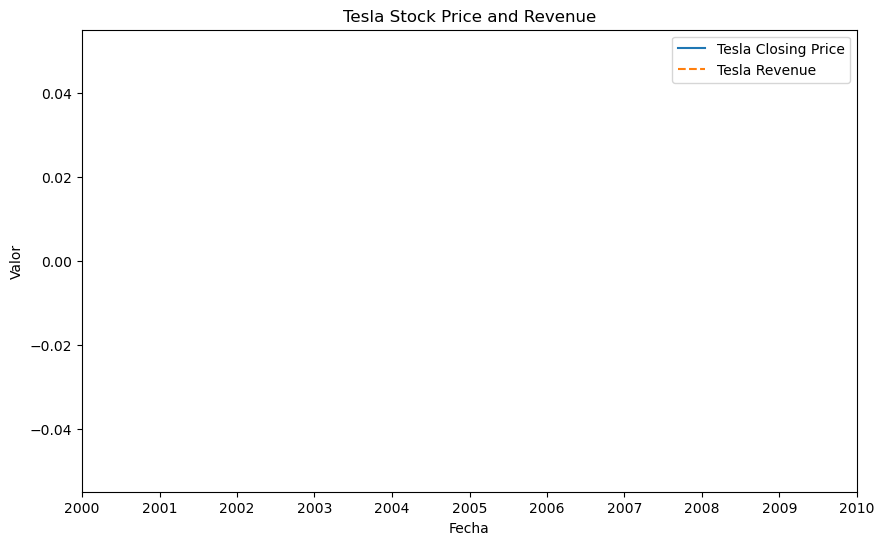

In [36]:
import pandas as pd
import matplotlib.pyplot as plt

def make_graph(tesla_data, tesla_revenue_1, stock_name):
    merged_data = pd.concat([tesla_data.set_index('Date'), tesla_revenue_1.set_index('año')], axis=1, join='inner')

    merged_data.index = pd.to_datetime(merged_data.index)
    merged_data = merged_data[merged_data.index > '2021-06-30']

    
    plt.figure(figsize=(10, 6))
    plt.plot(merged_data.index, merged_data['Close'], label=f'{stock_name} Closing Price')
    plt.plot(merged_data.index, merged_data['Revenue'], label=f'{stock_name} Revenue', linestyle='dashed')

    
    plt.title(f'{stock_name} Stock Price and Revenue')
    plt.xlabel('Fecha')
    plt.ylabel('Valor')
    plt.legend()

    
    plt.show()


make_graph(tesla_data, tesla_revenue_1, 'Tesla')

## Question 6: Plot GameStop Stock Graph


Use the `make_graph` function to graph the GameStop Stock Data, also provide a title for the graph. The structure to call the `make_graph` function is `make_graph(gme_data, gme_revenue, 'GameStop')`. Note the graph will only show data upto June 2021.


In [37]:
import pandas as pd
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"
tables = pd.read_html(url)
gme_revenue_1 = tables[1]
gme_revenue_1.head(22)

,GameStop Quarterly Revenue(Millions of US $),GameStop Quarterly Revenue(Millions of US $).1
0,2020-04-30,"$1,021"
1,2020-01-31,"$2,194"
2,2019-10-31,"$1,439"
3,2019-07-31,"$1,286"
4,2019-04-30,"$1,548"
5,2019-01-31,"$3,063"
6,2018-10-31,"$1,935"
7,2018-07-31,"$1,501"
8,2018-04-30,"$1,786"
9,2018-01-31,"$2,825"


In [38]:
gme_revenue_1.columns = ['FECHA', 'INGRESOS']
print(gme_revenue_1.columns)

Index(['FECHA', 'INGRESOS'], dtype='object')


In [39]:
gme_revenue_1["INGRESOS"] = gme_revenue_1['INGRESOS'].str.replace(',|\$',"")

In [40]:
gme_revenue_1.head(22)

,FECHA,INGRESOS
0,2020-04-30,1021
1,2020-01-31,2194
2,2019-10-31,1439
3,2019-07-31,1286
4,2019-04-30,1548
5,2019-01-31,3063
6,2018-10-31,1935
7,2018-07-31,1501
8,2018-04-30,1786
9,2018-01-31,2825


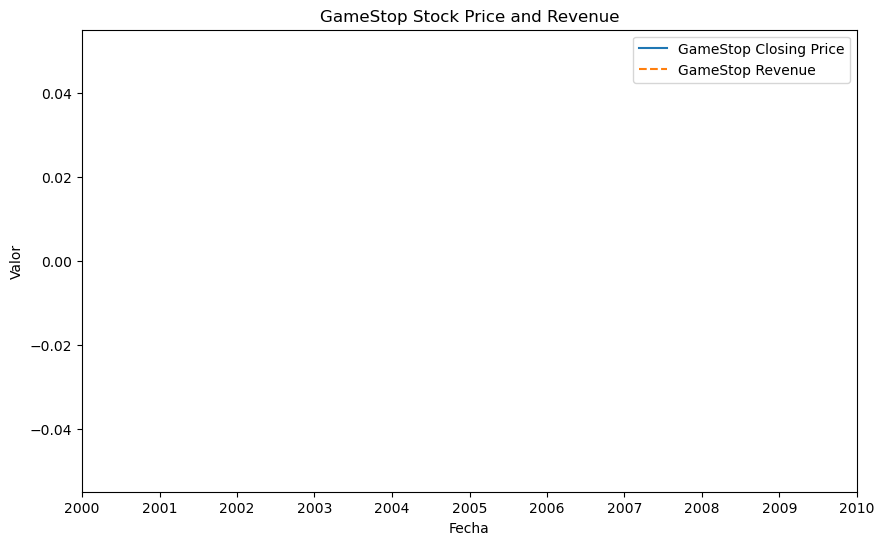

In [41]:
import pandas as pd
import matplotlib.pyplot as plt

def make_graph(gme_data, gme_revenue_1, stock_name):
    merged_data = pd.concat([gme_data.set_index('Date'), gme_revenue_1.set_index('FECHA')], axis=1, join='inner')

    merged_data.index = pd.to_datetime(merged_data.index)
    merged_data = merged_data[merged_data.index <= '2021-06-30']

    plt.figure(figsize=(10, 6))
    plt.plot(merged_data.index, merged_data['Close'], label=f'{stock_name} Closing Price')
    plt.plot(merged_data.index, merged_data['INGRESOS'], label=f'{stock_name} Revenue', linestyle='dashed')

    
    plt.title(f'{stock_name} Stock Price and Revenue')
    plt.xlabel('Fecha')
    plt.ylabel('Valor')
    plt.legend()

    
    plt.show()


make_graph(gme_data, gme_revenue_1, 'GameStop')

<h2>About the Authors:</h2> 

<a href="https://www.linkedin.com/in/joseph-s-50398b136/">Joseph Santarcangelo</a> has a PhD in Electrical Engineering, his research focused on using machine learning, signal processing, and computer vision to determine how videos impact human cognition. Joseph has been working for IBM since he completed his PhD.

Azim Hirjani


## Change Log

| Date (YYYY-MM-DD) | Version | Changed By    | Change Description        |
| ----------------- | ------- | ------------- | ------------------------- |
| 2022-02-28        | 1.2     | Lakshmi Holla | Changed the URL of GameStop |
| 2020-11-10        | 1.1     | Malika Singla | Deleted the Optional part |
| 2020-08-27        | 1.0     | Malika Singla | Added lab to GitLab       |

<hr>

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>

<p>
